<a href="https://colab.research.google.com/github/mfilipak/AUTOCOM2024/blob/main/ChatGP_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Dados
data = {
    'Preço': [1200, 200, 50, 100, 3000, 150, 30, 80, 2200, 350, 60, 120, 2500, 100, 45, 110, 2000, 250, 35, 90, 2600, 220, 25, 150, 2800, 175, 40, 130, 3100, 300],
    'Custo': [800, 100, 20, 50, 2000, 75, 10, 40, 1500, 200, 30, 60, 1700, 50, 25, 55, 1300, 125, 15, 45, 1800, 110, 12, 75, 1900, 90, 18, 65, 2100, 150],
    'Estoque': [100, 150, 500, 250, 50, 300, 600, 200, 90, 400, 450, 350, 75, 500, 550, 300, 85, 450, 700, 400, 65, 350, 800, 220, 70, 600, 650, 380, 60, 420],
    'Promoção': ['Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não'],
    'Vendas_Mensais': [30, 50, 200, 40, 15, 60, 250, 30, 20, 70, 300, 50, 18, 80, 220, 35, 22, 65, 320, 45, 17, 55, 400, 55, 19, 75, 275, 60, 14, 85]
}

df = pd.DataFrame(data)
label_encoder = LabelEncoder()
df['Promoção'] = label_encoder.fit_transform(df['Promoção'])

# Divisão dos dados em treino e teste
X = df.drop('Vendas_Mensais', axis=1)
y = df['Vendas_Mensais']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)




In [3]:
# Modelo de Random Forest com 100 árvores
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
# Resultados
print(f"Random Forest MSE: {mse_rf}")



Random Forest MSE: 115.64668333333331


In [4]:
# Modelo de rede neural com 2 camadas intermediárias
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
# Resultados
print(f"Neural Network MSE: {mse_nn}")




Neural Network MSE: 277.7781086047711


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
# Modelo de árvore de decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Resultados
print(f"Decision Tree MSE: {mse_dt}")

Decision Tree MSE: 163.16666666666666


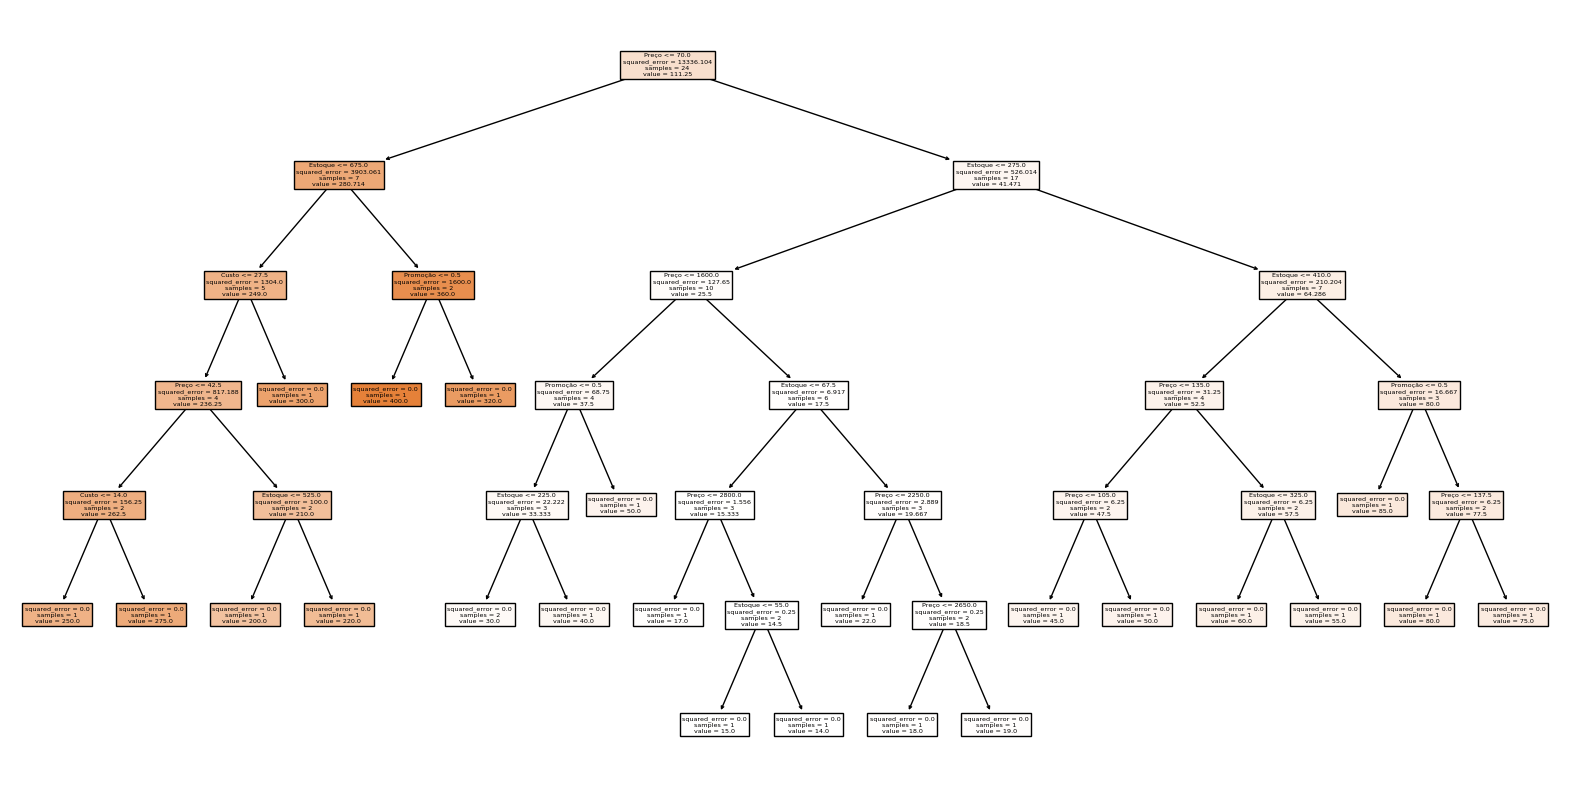

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns), max_depth=6)
plt.show()

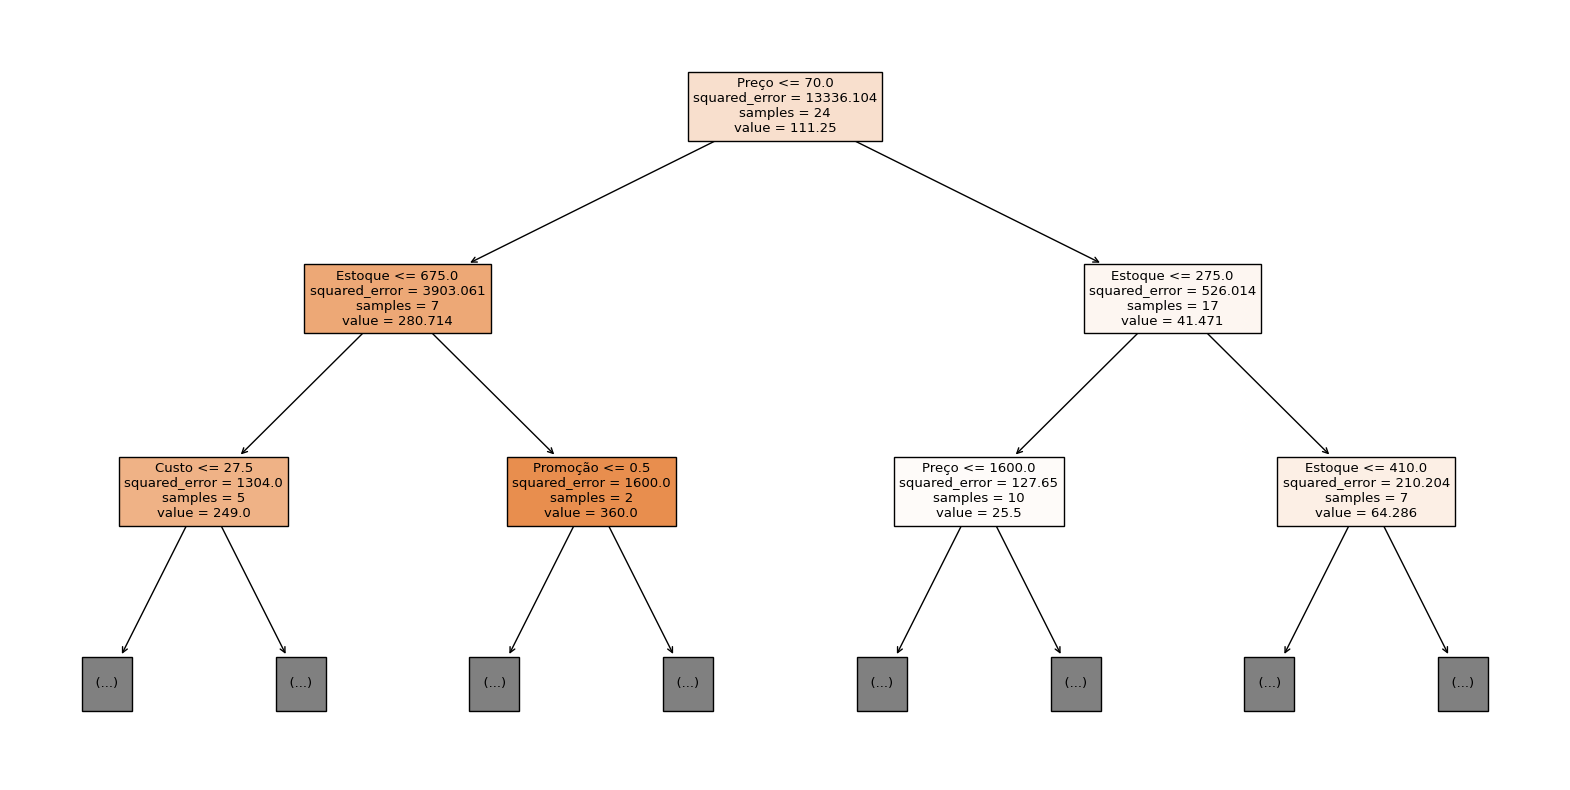

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns), max_depth=2)
plt.show()